<img src="img/PCA.png"/>

CS229 by Andrew Ng [14 PCA from 37:37](https://www.youtube.com/watch?v=ey2PE5xi9-A) [15 Implementation of PCA using SVD from 17:17](https://www.youtube.com/watch?v=QGd06MTRMHs) 

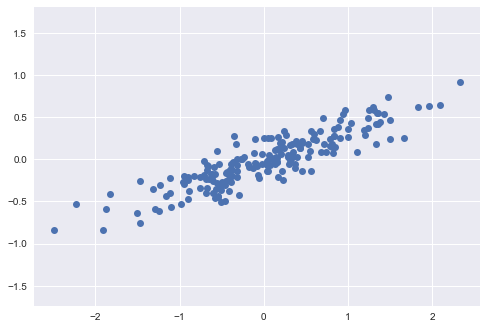

[ 0.75871884  0.01838551]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


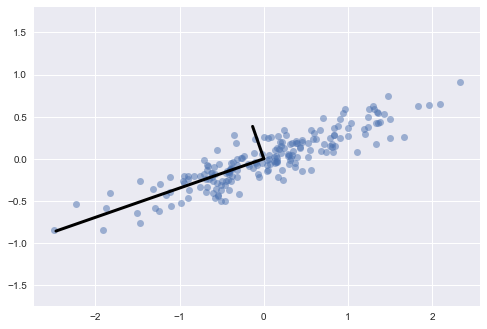

(200, 2)
(200, 1)


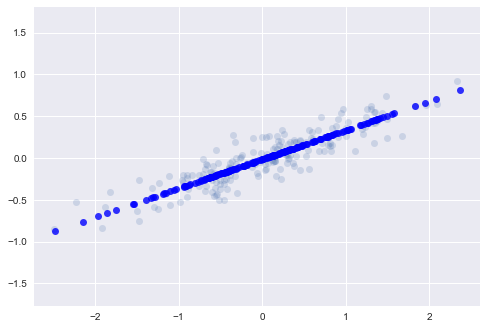

In [2]:
# Introducing Principal Component Analysis
# https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

# load data
np.random.seed(1) 
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');
plt.show()

# PCA using 2 components
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

# plot of 2 loading vectors
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');
plt.show()

# PCA using 95% of variance 
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

# plot of 95% components 
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');
plt.show()

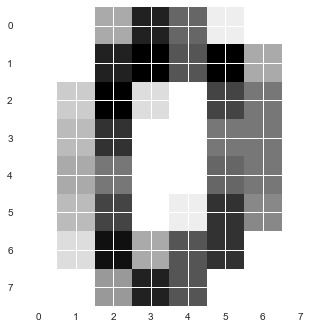

(1797, 64)
(1797, 2)
(1797, 64)


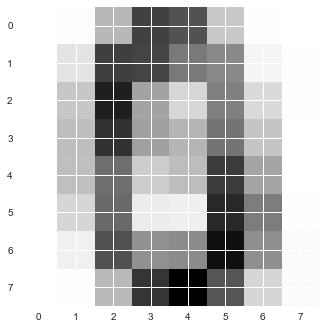

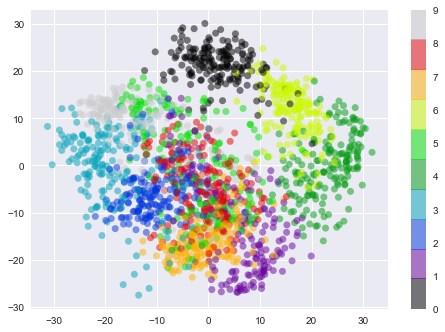

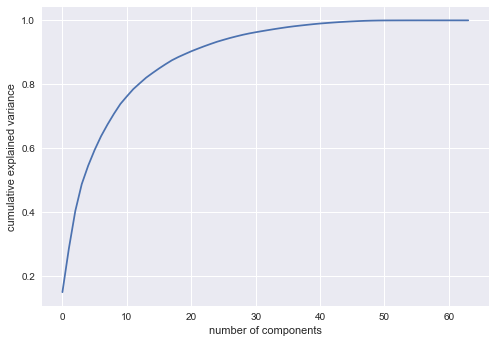

In [6]:
# Application of PCA to Digits
# https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import functions_from_Hvass as H

# load data
digits = load_digits()
X = digits.data
y = digits.target

# original image
img = X[0,:]
img_shape = (8, 8)
H.plot_image(img, img_shape)

# PCA using 2 components
clf = PCA(2)  # project from 64 to 2 dimensions
X_proj = clf.fit_transform(X)
X_new = clf.inverse_transform(X_proj)
print(X.shape)
print(X_proj.shape)
print(X_new.shape)

# reconstructed image using 2 PCA components 
img = X_new[0,:]
img_shape = (8, 8)
H.plot_image(img, img_shape)

# scatter plot of 2 PCA scores 
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();
plt.show()

# cumulative explained variance as a function of the number of components  
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

# Exercise.

Using the data set from sklearn.datasets as we did in the above code
reproduce the below figure using tensorflow instead of PCA from sklearn.decomposition.

<img src="img/PCA_tensorflow.png"/>




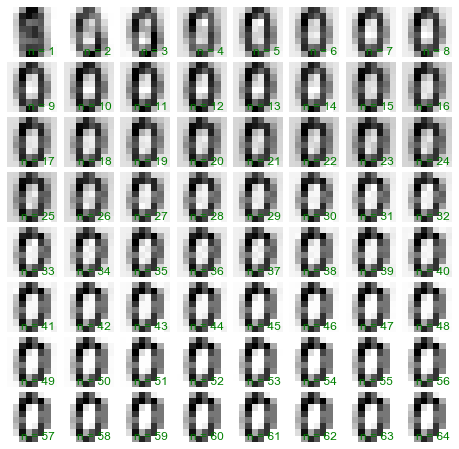

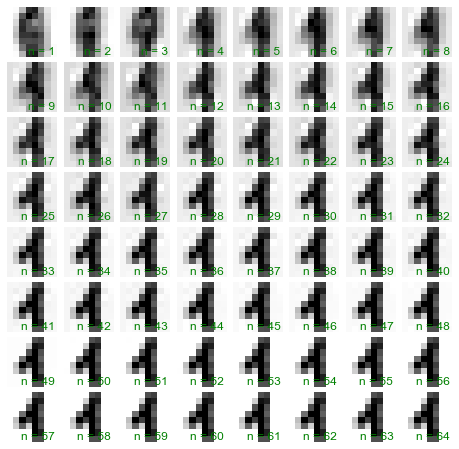

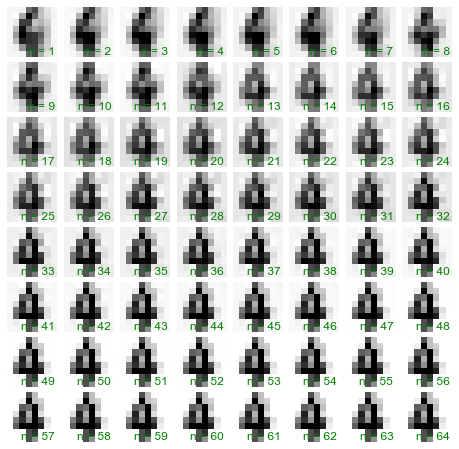

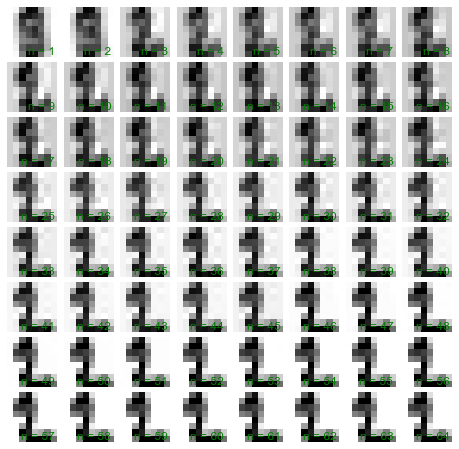

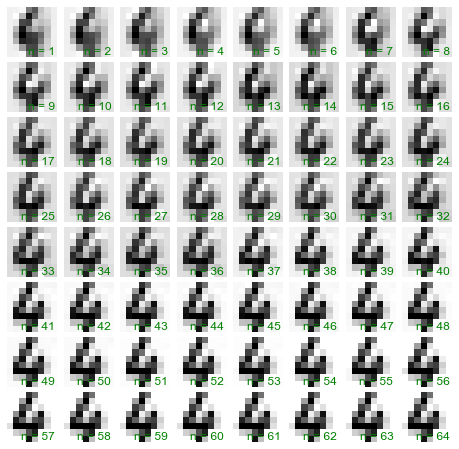

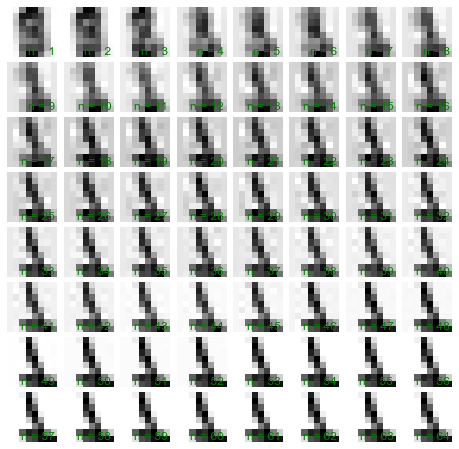

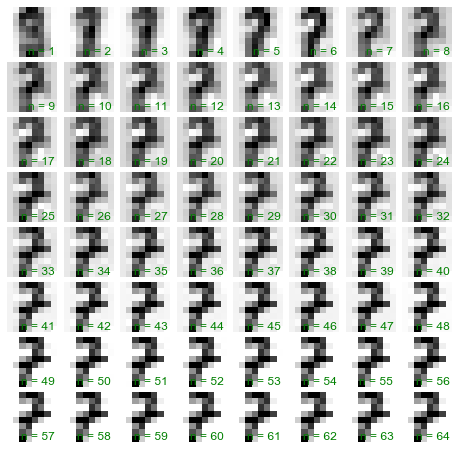

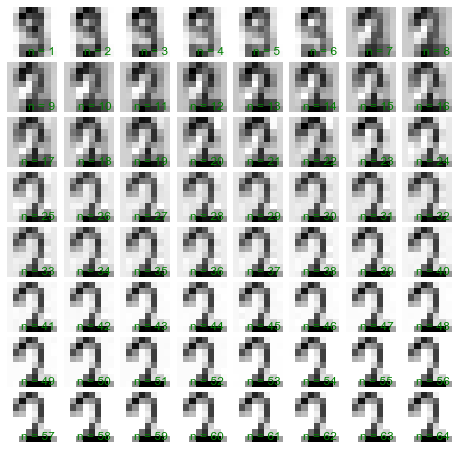

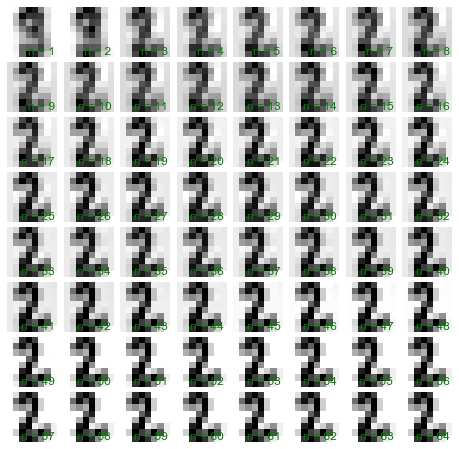

In [1]:
# PCA as data compression
# https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import functions_from_Hvass as H

# load data
digits = load_digits()
X = digits.data
y = digits.target

# reconstructed images using 1, 2, 3, 4,...,64 PCA components 
for index in [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600]:
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        pca = PCA(i + 1).fit(X)
        im = pca.inverse_transform(pca.transform(X[index:index+1]))

        ax.imshow(im.reshape((8, 8)), cmap='binary')
        ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
                transform=ax.transAxes, color='green')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()